In [1]:
# script to make first figure, single voxel fit for all tasks
# add to plotting/ folder (non existing for now, put in root) in git repo
# will be the folder with scripts to make figures for paper

In [1]:
import os, json
import sys, glob
import numpy as np
from utils import *

import matplotlib.pyplot as plt
from nilearn import surface


In [2]:
# define paths
sj = '08' #fill subject number with 0 in case user forgets	

with open('analysis_params.json','r') as json_file:	
        analysis_params = json.load(json_file)	
    
images = {}
with_smooth = 'False'#analysis_params['with_smooth']
PSC = True

if with_smooth=='True':
    soma_path =  os.path.join(analysis_params['soma_outdir'],'sub-{sj}'.format(sj=sj),'run-median','smooth')
    # load prf estimates
    median_path = os.path.join(analysis_params['pRF_outdir'],'sub-{sj}'.format(sj=sj),'run-median','smooth')
else:
    soma_path =  os.path.join(analysis_params['soma_outdir'],'sub-{sj}'.format(sj=sj),'run-median')
    # load prf estimates
    median_path = os.path.join(analysis_params['pRF_outdir'],'sub-{sj}'.format(sj=sj),'run-median')

post_prf_path = os.path.join(analysis_params['post_fmriprep_outdir'],'prf','sub-{sj}'.format(sj=sj))
post_soma_path = os.path.join(analysis_params['post_fmriprep_outdir'],'soma','sub-{sj}'.format(sj=sj))

In [3]:
# get list of absolute paths for functional prf files
gii_list = [os.path.join(analysis_params['post_fmriprep_outdir'],'prf','sub-{sj}'.format(sj=sj),x) for x in os.listdir(post_prf_path) if x.endswith('sg.func.gii') ]
gii_list.sort()

if PSC == True:
    gii_list = psc_gii(gii_list,post_prf_path, method='median')


/home/verissimo/SB-ref/analysis/utils.py:597: RuntimeWarning: divide by zero encountered in true_divide
  data_conv = 100.0 * (data_in - data_m)/np.abs(data_m)
/home/verissimo/SB-ref/analysis/utils.py:597: RuntimeWarning: invalid value encountered in true_divide
  data_conv = 100.0 * (data_in - data_m)/np.abs(data_m)


saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-01_space-fsaverage_hemi-L_sg_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-01_space-fsaverage_hemi-R_sg_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-02_space-fsaverage_hemi-L_sg_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-02_space-fsaverage_hemi-R_sg_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-03_space-fsaverage_hemi-L_sg_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-03_space-fsaverage_hemi-R_sg_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-0

In [4]:
# load, append and compute median run (both hemispheres now combined)
data_gii = []
for run in np.arange(1,6): # for every run (2 hemi per run)

    run_files = [x for _,x in enumerate(gii_list) if 'run-'+str(run).zfill(2) in os.path.split(x)[-1]]

    if not run_files:
        print('no files for run-%s' %str(run).zfill(2))
    else:

        data_both = []
        for _,hemi in enumerate(run_files):
            data_both.append(surface.load_surf_data(hemi).T) #load surface data

        data_both = np.hstack(data_both) #stack then filter
        print('loading run %s' %hemi)

        data_gii.append(data_both)

median_data_gii = np.median(data_gii,axis=0)     

loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-01_space-fsaverage_hemi-R_sg_psc.func.gii
loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-02_space-fsaverage_hemi-R_sg_psc.func.gii
loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-03_space-fsaverage_hemi-R_sg_psc.func.gii
loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-04_space-fsaverage_hemi-R_sg_psc.func.gii
loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/prf/sub-08/sub-08_ses-01_task-prf_run-05_space-fsaverage_hemi-R_sg_psc.func.gii


/home/verissimo/miniconda3/envs/i36/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 2502270 results
  r = func(a, **kwargs)


In [5]:
# load estimates
estimates_list = [x for x in os.listdir(median_path) if x.endswith('estimates.npz') ]
estimates_list.sort() #sort to make sure pRFs not flipped

estimates = []
for _,val in enumerate(estimates_list) :
  estimates.append(np.load(os.path.join(median_path, val))) #save both hemisphere estimates in same array

# concatenate r2 and parameteres, to later visualize whole brain
rsq = np.concatenate((estimates[0]['r2'],estimates[1]['r2']))

xx = np.concatenate((estimates[0]['x'],estimates[1]['x']))
yy = np.concatenate((estimates[0]['y'],estimates[1]['y']))

size = np.concatenate((estimates[0]['size'],estimates[1]['size']))
baseline = np.concatenate((estimates[0]['baseline'],estimates[1]['baseline']))
beta = np.concatenate((estimates[0]['betas'],estimates[1]['betas']))


In [6]:
# exception for these 2 subjects, TR was different
for string in ['sub-01_ses-01', 'sub-03_ses-01']:
    if re.search(string, gii_list[0]):
        TR = 1.5
    else:
        TR = analysis_params["TR"]

In [7]:
# plot time series in vertex where rsq is max
index = np.where(rsq == max(rsq))
index = index[0][0]

timeseries = median_data_gii[...,index]
timeseries = timeseries.reshape(timeseries.size)

(0, 90)

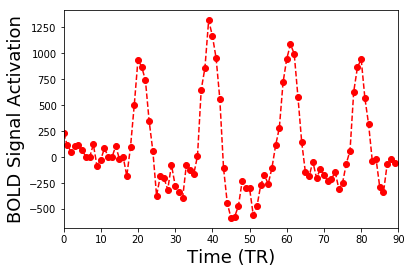

In [8]:
plt.plot(range(len(timeseries)),timeseries, linestyle='--', marker='o',c='r')
#plt.scatter(range(len(timeseries)),timeseries,c='k',marker='.')
plt.xlabel('Time (TR)',fontsize=18)
plt.ylabel('BOLD Signal Activation',fontsize=18)
plt.xlim(0,len(timeseries))


In [9]:
# load bar pass
dm_filename = os.path.join(os.getcwd(),'prf_dm.npy')
prf_dm = np.load(dm_filename)    
prf_dm = prf_dm.T #swap axis for popeye (x,y,time)

plot_dm = np.swapaxes(prf_dm,0,1)

In [10]:
import scipy
sig_peaks = scipy.signal.find_peaks(timeseries,height=2) #find peaks

In [11]:
sig_peaks

(array([ 4,  8, 11, 14, 16, 20, 39, 61, 80]),
 {'peak_heights': array([ 117.04231262,  122.8494873 ,   87.67172241,  107.09663391,
            5.85801554,  939.69940186, 1319.27648926, 1088.27746582,
          945.03741455])})

In [12]:
sig_peaks[1]['peak_heights']

array([ 117.04231262,  122.8494873 ,   87.67172241,  107.09663391,
          5.85801554,  939.69940186, 1319.27648926, 1088.27746582,
        945.03741455])

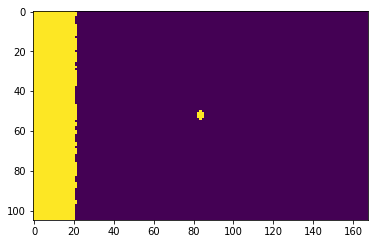

In [13]:
fig, ax = plt.subplots()
ax.imshow(plot_dm[:,:,39])

In [14]:
# conclusao
# selecionar voxel de interesse, fazer find peaks para ver TR exacto daquele bar pass
# depois em ppt ou photoshop ou algo do genero pôr screenshot correspondente àquele TR

In [15]:
# agora SOMA

In [16]:
# get list of absolute paths for functional prf files
soma_list = [os.path.join(analysis_params['post_fmriprep_outdir'],'soma','sub-{sj}'.format(sj=sj),x) for x in os.listdir(post_soma_path) if x.endswith('conf.func.gii') ]
soma_list.sort()

if PSC == True:
    soma_list = psc_gii(soma_list,post_soma_path, method='median')

saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-01_space-fsaverage_hemi-L_sg_conf_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-01_space-fsaverage_hemi-R_sg_conf_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-02_space-fsaverage_hemi-L_sg_conf_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-02_space-fsaverage_hemi-R_sg_conf_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-03_space-fsaverage_hemi-L_sg_conf_psc.func.gii
saving /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-03_space-fsaverage_hemi-R_sg_conf_psc.func.gii
saving /home/shared/2018/visual/SB-prep/

In [17]:
# load, append and compute median run (both hemispheres now combined)
data_soma_gii = []
for run in np.arange(1,5): # for every run (2 hemi per run)

    run_files = [x for _,x in enumerate(soma_list) if 'run-'+str(run).zfill(2) in os.path.split(x)[-1]]

    if not run_files:
        print('no files for run-%s' %str(run).zfill(2))
    else:

        data_both = []
        for _,hemi in enumerate(run_files):
            data_both.append(surface.load_surf_data(hemi).T) #load surface data

        data_both = np.hstack(data_both) #stack then filter
        print('loading run %s' %hemi)

        data_soma_gii.append(data_both)

median_data_soma_gii = np.median(data_soma_gii,axis=0) 

loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-01_space-fsaverage_hemi-R_sg_conf_psc.func.gii
loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-02_space-fsaverage_hemi-R_sg_conf_psc.func.gii
loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-03_space-fsaverage_hemi-R_sg_conf_psc.func.gii
loading run /home/shared/2018/visual/SB-prep/SB-ref/derivatives/post_fmriprep/soma/sub-08/sub-08_ses-01_task-soma_run-04_space-fsaverage_hemi-R_sg_conf_psc.func.gii


/home/verissimo/miniconda3/envs/i36/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 3920223 results
  r = func(a, **kwargs)


In [18]:
# load paths for contrasts
face_contrast = np.load(os.path.join(soma_path,'z_face_contrast.npy'))
hand_contrast = np.load(os.path.join(soma_path,'z_upper_limb_contrast.npy'))
leg_contrast = np.load(os.path.join(soma_path,'z_lower_limb_contrast.npy'))

In [19]:
face_index = np.where(face_contrast == max(face_contrast))[0][0]
hand_index = np.where(hand_contrast == max(hand_contrast))[0][0]
leg_index = np.where(leg_contrast == max(leg_contrast))[0][0]


In [20]:
face_timeseries = median_data_soma_gii[...,face_index]
face_timeseries = face_timeseries.reshape(face_timeseries.size)

hand_timeseries = median_data_soma_gii[...,hand_index]
hand_timeseries = hand_timeseries.reshape(hand_timeseries.size)

leg_timeseries = median_data_soma_gii[...,leg_index]
leg_timeseries = leg_timeseries.reshape(leg_timeseries.size)

In [97]:
# load events and do median of them to add to plot
alleventdir = glob.glob(os.path.join(analysis_params['sourcedata_dir'],'sub-{sj}'.format(sj=sj),'*','func/*'))

# list of stimulus onsets
events = [run for run in alleventdir if 'soma' in run and run.endswith('events.tsv')]
events.sort()

# Append all events in same dataframe
print('Loading events')

all_events = []
for _,val in enumerate(events):

    events_pd = pd.read_csv(val,sep = '\t')

    new_events = []

    for ev in events_pd.iterrows():
        row = ev[1]   
        if row['trial_type'][0] == 'b': # if both hand/leg then add right and left events with same timings
            new_events.append([row['onset'],row['duration'],'l'+row['trial_type'][1:]])
            new_events.append([row['onset'],row['duration'],'r'+row['trial_type'][1:]])
        else:
            new_events.append([row['onset'],row['duration'],row['trial_type']])

    df = pd.DataFrame(new_events, columns=['onset','duration','trial_type'])  #make sure only relevant columns present
    all_events.append(df)

# make median event dataframe
onsets = []
durations = []
for w in range(len(all_events)):
    onsets.append(all_events[w]['onset'])
    durations.append(all_events[w]['duration'])

events_avg = pd.DataFrame({'onset':np.mean(np.array(onsets),axis=0),'duration':np.mean(np.array(durations),axis=0),'trial_type':all_events[0]['trial_type']})
# event onsets in TR instead of seconds
events_inTR = events_avg['onset']/TR

# name of stim in order
stimulus_setup = np.array([s.split('.avi')[0] for s in analysis_params['soma_stimulus']]) 

Loading events


In [99]:
# see if non-event one looks nicer
events_inTR = (np.linspace(events_avg['onset'][0],events_avg['onset'][len(events_avg['onset'])-1],num = len(events_avg['onset'])))/TR

#looks nicer.. was there an issue with the events? check it later,might need to change and do contrasts again..

(0, 141)

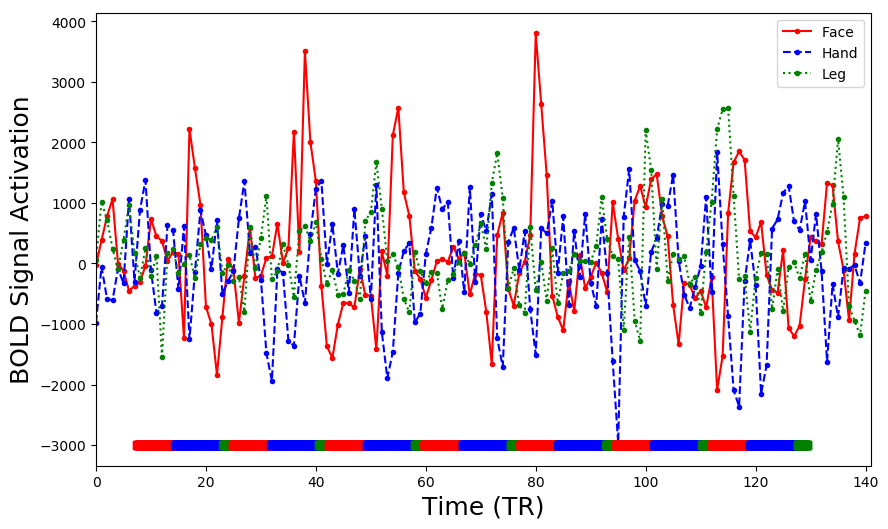

In [101]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(range(len(face_timeseries)),face_timeseries, linestyle='-',c='r',label='face',marker='.')
plt.plot(range(len(hand_timeseries)),hand_timeseries, linestyle='--',c='b',label='hand',marker='.')
plt.plot(range(len(leg_timeseries)),leg_timeseries, linestyle=':',c='g',label='leg',marker='.')

counter = 0
while counter <= len(stimulus_setup):
    face_line = np.arange(events_inTR[0+counter],events_inTR[4+counter],0.05)
    hand_line = np.arange(events_inTR[4+counter],events_inTR[9+counter],0.05)
    leg_line = np.arange(events_inTR[9+counter],events_inTR[10+counter],0.05)
    plt.plot(face_line,[-3000]*len(face_line),marker='s',c='r')
    plt.plot(hand_line,[-3000]*len(hand_line),marker='s',c='b')
    plt.plot(leg_line,[-3000]*len(leg_line),marker='s',c='g')
    counter += 10

plt.xlabel('Time (TR)',fontsize=18)
plt.ylabel('BOLD Signal Activation',fontsize=18)
plt.legend(['Face','Hand','Leg'], fontsize=10)
plt.xlim(0,len(face_timeseries))

In [81]:
events_avg['onset']

0      11.983677
1      15.340416
2      18.700537
3      22.053998
4      25.404087
5      28.751158
6      32.097646
7      35.444438
8      38.791498
9      42.137931
10     45.484718
11     48.831518
12     52.181622
13     55.528351
14     58.875143
15     58.875143
16     62.221891
17     62.221891
18     65.568651
19     65.568651
20     68.915410
21     68.915410
22     72.265555
23     72.265555
24     75.615637
25     75.615637
26     78.965766
27     82.312569
28     85.659297
29     89.006067
         ...    
42    132.521021
43    135.867846
44    139.217963
45    142.564416
46    145.911470
47    149.261276
48    152.611466
49    155.958169
50    159.308257
51    159.308257
52    162.678417
53    162.678417
54    166.055121
55    166.055121
56    169.428976
57    169.428976
58    172.812643
59    172.812643
60    176.185748
61    176.185748
62    179.572229
63    182.932380
64    186.292442
65    189.652543
66    193.012636
67    196.393115
68    199.763513
69    203.1363

In [76]:
stimulus_setup[10]

'eyebrows'